# Elmy
## Exploratory Data Analysis 

In [1]:
import os 
import datetime

import pandas as pd
import numpy as np 
import json

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer

from sklearn.decomposition import PCA

## Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor


## Classification Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
from scipy.optimize import minimize

In [19]:
path_file_x_train = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))+ "/datasets/elmy_spot_vs_intraday/raw_data/X_train.csv"
path_file_y_train = os.path.abspath(os.path.join(os.getcwd(), "..", "..")) + "/datasets/elmy_spot_vs_intraday/raw_data/y_train.csv"
path_file_x_test = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))+  "/datasets/elmy_spot_vs_intraday/raw_data/X_test.csv"

path_param_models = os.path.dirname(os.getcwd()) + "/datasets/elmy_spot_vs_intraday/params_models/"

X_train = pd.read_csv(path_file_x_train)
X_test = pd.read_csv(path_file_x_test)
y_train = pd.read_csv(path_file_y_train)

X_train['DELIVERY_START'] = pd.to_datetime(X_train['DELIVERY_START'],utc = True)
X_test['DELIVERY_START'] = pd.to_datetime(X_test['DELIVERY_START'],utc = True)
y_train['DELIVERY_START'] = pd.to_datetime(y_train['DELIVERY_START'],utc = True)
X_train.set_index("DELIVERY_START", inplace = True)
X_test.set_index("DELIVERY_START", inplace = True)
y_train.set_index("DELIVERY_START", inplace = True)
df_train = pd.concat([X_train,y_train], axis = 1)
df_train.sort_index(inplace = True)

## I.1) Basic Stuff

In [20]:
X_train.head()

,load_forecast,coal_power_available,gas_power_available,nucelear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price
DELIVERY_START,,,,,,,,,
2022-01-01 01:00:00+00:00,49439.0,3386.0,11487.0,44118.0,3035.0,0.0,79.248348,0.0,NaN
2022-01-01 02:00:00+00:00,46511.0,3386.0,11487.0,44118.0,3143.0,0.0,61.776532,0.0,NaN
2022-01-01 03:00:00+00:00,45158.0,3386.0,11487.0,44118.0,3288.0,0.0,44.291112,0.0,NaN
2022-01-01 04:00:00+00:00,44779.0,3386.0,11487.0,44118.0,3447.0,0.0,36.127588,0.0,NaN
2022-01-01 05:00:00+00:00,45284.0,3386.0,11487.0,44118.0,3679.0,0.0,30.983023,0.0,NaN


In [21]:
X_test.head()

,load_forecast,coal_power_available,gas_power_available,nucelear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price
DELIVERY_START,,,,,,,,,
2023-04-01 22:00:00+00:00,45814.0,3386.0,10902.0,36705.0,6359.0,0.0,56.764535,0.0,NaN
2023-04-01 23:00:00+00:00,44084.0,3386.0,10902.0,36705.0,6469.0,0.0,54.262133,0.0,NaN
2023-04-02 00:00:00+00:00,43281.0,3386.0,10902.0,36705.0,6511.0,0.0,78.105928,0.0,NaN
2023-04-02 01:00:00+00:00,40825.0,3386.0,10902.0,36705.0,6628.0,0.0,78.187557,0.0,NaN
2023-04-02 02:00:00+00:00,39181.0,3386.0,10902.0,36705.0,6700.0,0.0,96.765484,0.0,NaN


In [22]:
print("In the train set :")
print(f"number of rows : {X_train.shape[0]}")
print(f"number of columns : {X_train.shape[1]}")

In the train set :
number of rows : 10605
number of columns : 9


In [23]:
print("In the test set :")
print(f"number of rows : {X_test.shape[0]}")
print(f"number of columns : {X_test.shape[1]}")

In the test set :
number of rows : 4942
number of columns : 9


In [24]:
print(f"the period of the train set goes from : {X_train.index[0]} to : {X_train.index[-1]}")
print(f"the period of the test set goes from : {X_test.index[0]} to : {X_test.index[-1]}")

the period of the train set goes from : 2022-01-01 01:00:00+00:00 to : 2023-03-29 21:00:00+00:00
the period of the test set goes from : 2023-04-01 22:00:00+00:00 to : 2023-10-24 21:00:00+00:00


## I.2) Missing Values

In [43]:
missing_values_train = (X_train.isna().sum(axis = 0)/X_train.shape[0] * 100).sort_values(ascending = False)
missing_values_test = (X_test.isna().sum(axis = 0)/X_test.shape[0] * 100).sort_values(ascending = False)

missing_values = pd.concat([missing_values_train,missing_values_test], axis = 1).rename({0:'train', 1 : 'test'}, axis = 1)

In [44]:
missing_values

,train,test
predicted_spot_price,82.593116,31.080534
load_forecast,12.135785,0.000000
wind_power_forecasts_average,0.226308,0.000000
solar_power_forecasts_average,0.226308,0.485633
wind_power_forecasts_std,0.226308,0.000000
solar_power_forecasts_std,0.226308,0.485633
coal_power_available,0.009430,0.000000
gas_power_available,0.009430,0.000000
nucelear_power_available,0.009430,0.000000


<Axes: >

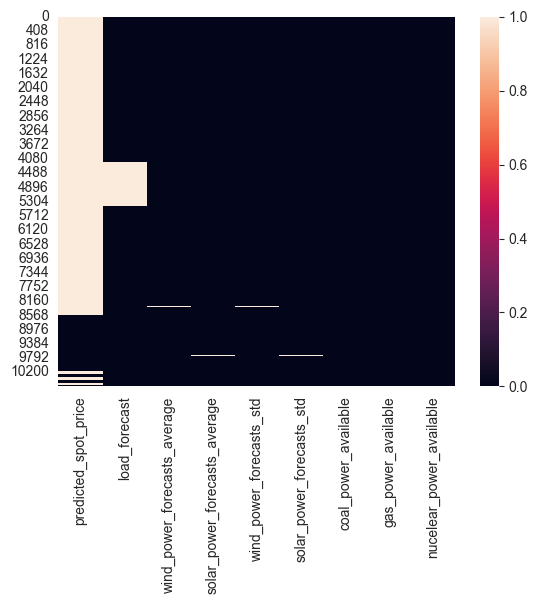

In [45]:
sns.heatmap(X_train[missing_values.index].isna().reset_index(drop = True), cbar = True)

The distribution of the missing values is quite surprising : 
- the predicted spot price is missing from nearly all rows 
- the load forecast is missing for a specific period
- Other missing values are in little numbers and could be due to *little* issues with data

Handling the missing values doesn't seem so straightforward as if we thought about dropping : 
- the column predicted_spot_price as it's mostly missing
- the rows of missing wind, coal, nuclear etc. as there is few missing values      

The question of what to do with the load forecast is still present as we are in the in-between

## I.3) Relations between predictors and target variable

In [55]:
predictors_col = X_train.columns.to_list()

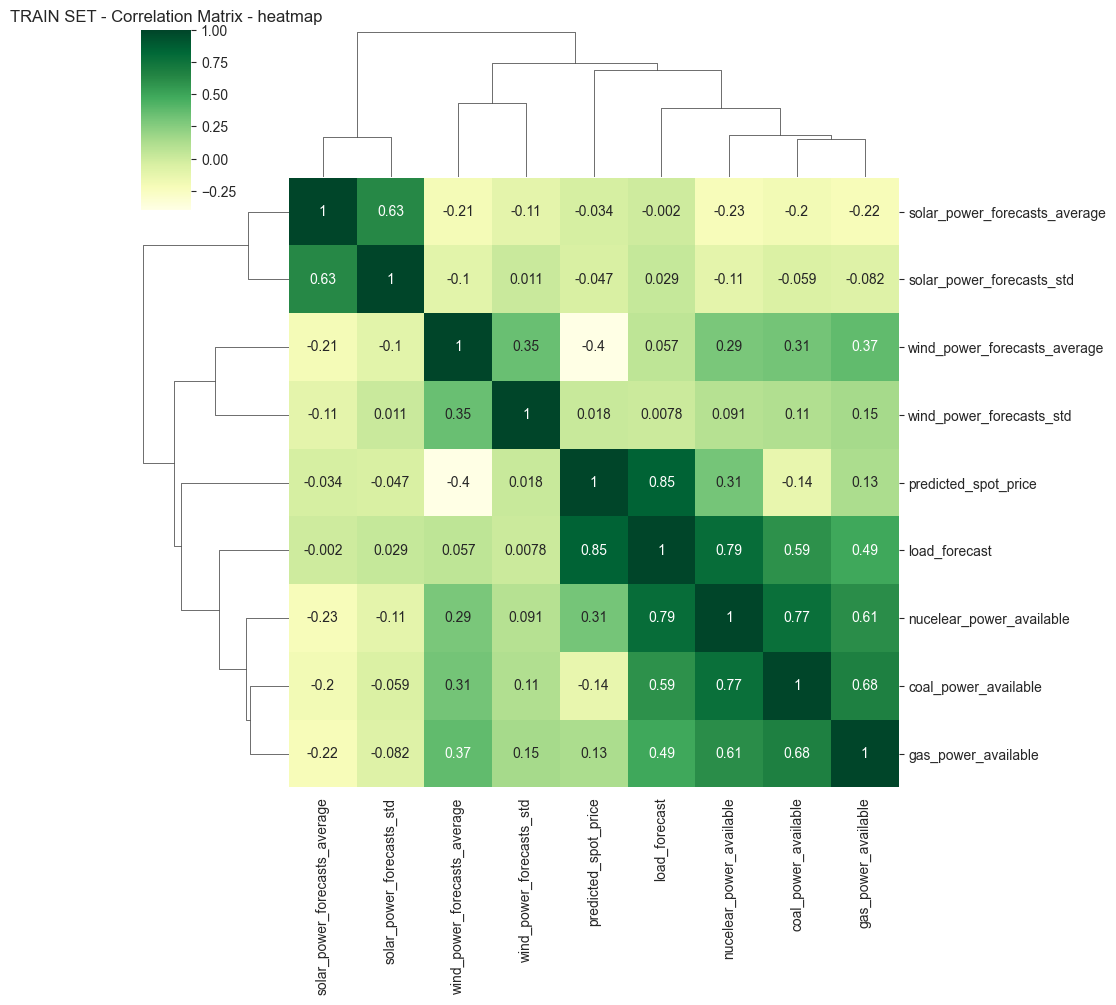

In [56]:
sns.clustermap(X_train.reset_index(drop = True).corr(), annot =True, cmap = "YlGn")
plt.title("TRAIN SET - Correlation Matrix - heatmap")
plt.show()

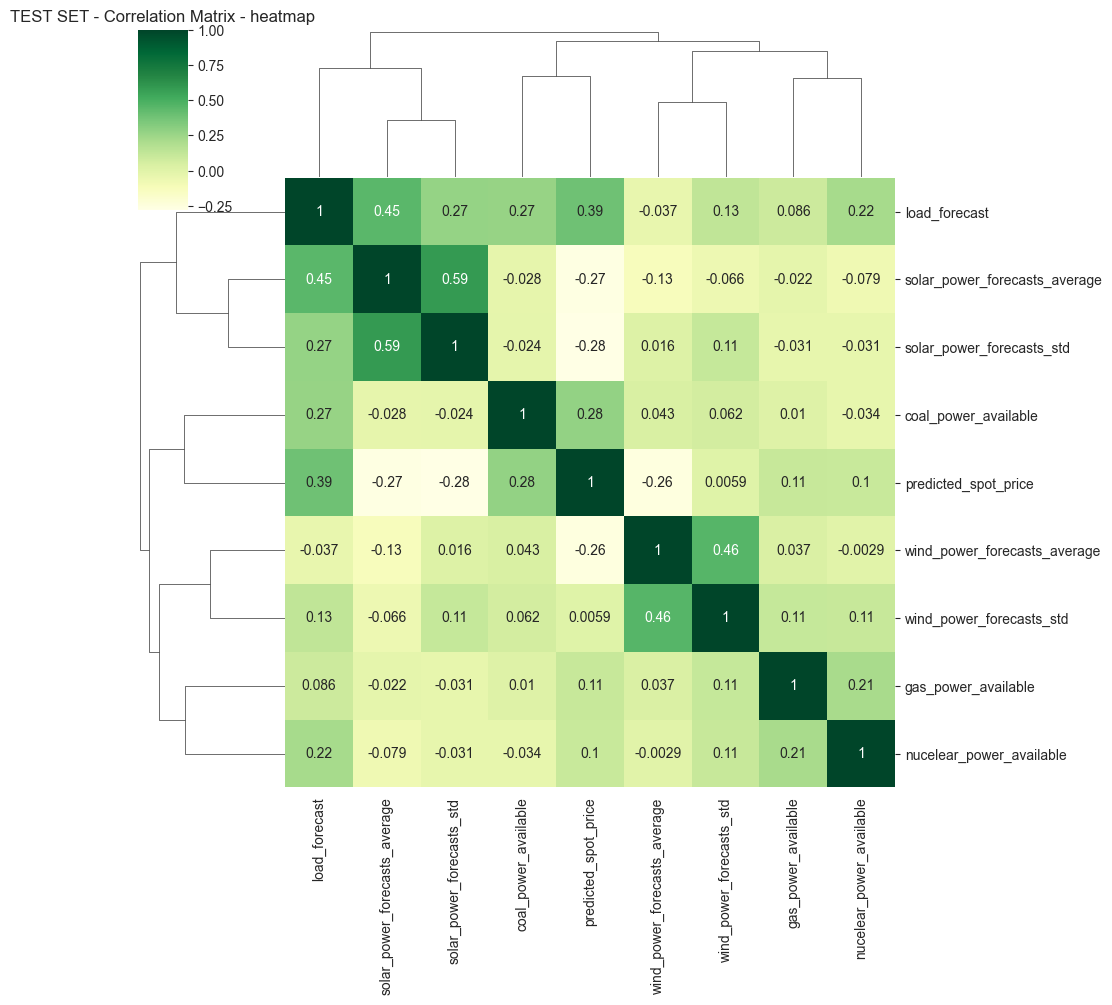

In [57]:
sns.clustermap(X_test.reset_index(drop = True).corr(), annot =True, cmap = "YlGn")
plt.title("TEST SET - Correlation Matrix - heatmap")
plt.show()

In [58]:
X_train_temp = X_train.copy()
X_train_temp['set'] = 'train'
X_test_temp = X_test.copy()
X_test_temp['set'] = 'test'
df_temp = pd.concat([X_train_temp,X_test_temp], axis = 0)

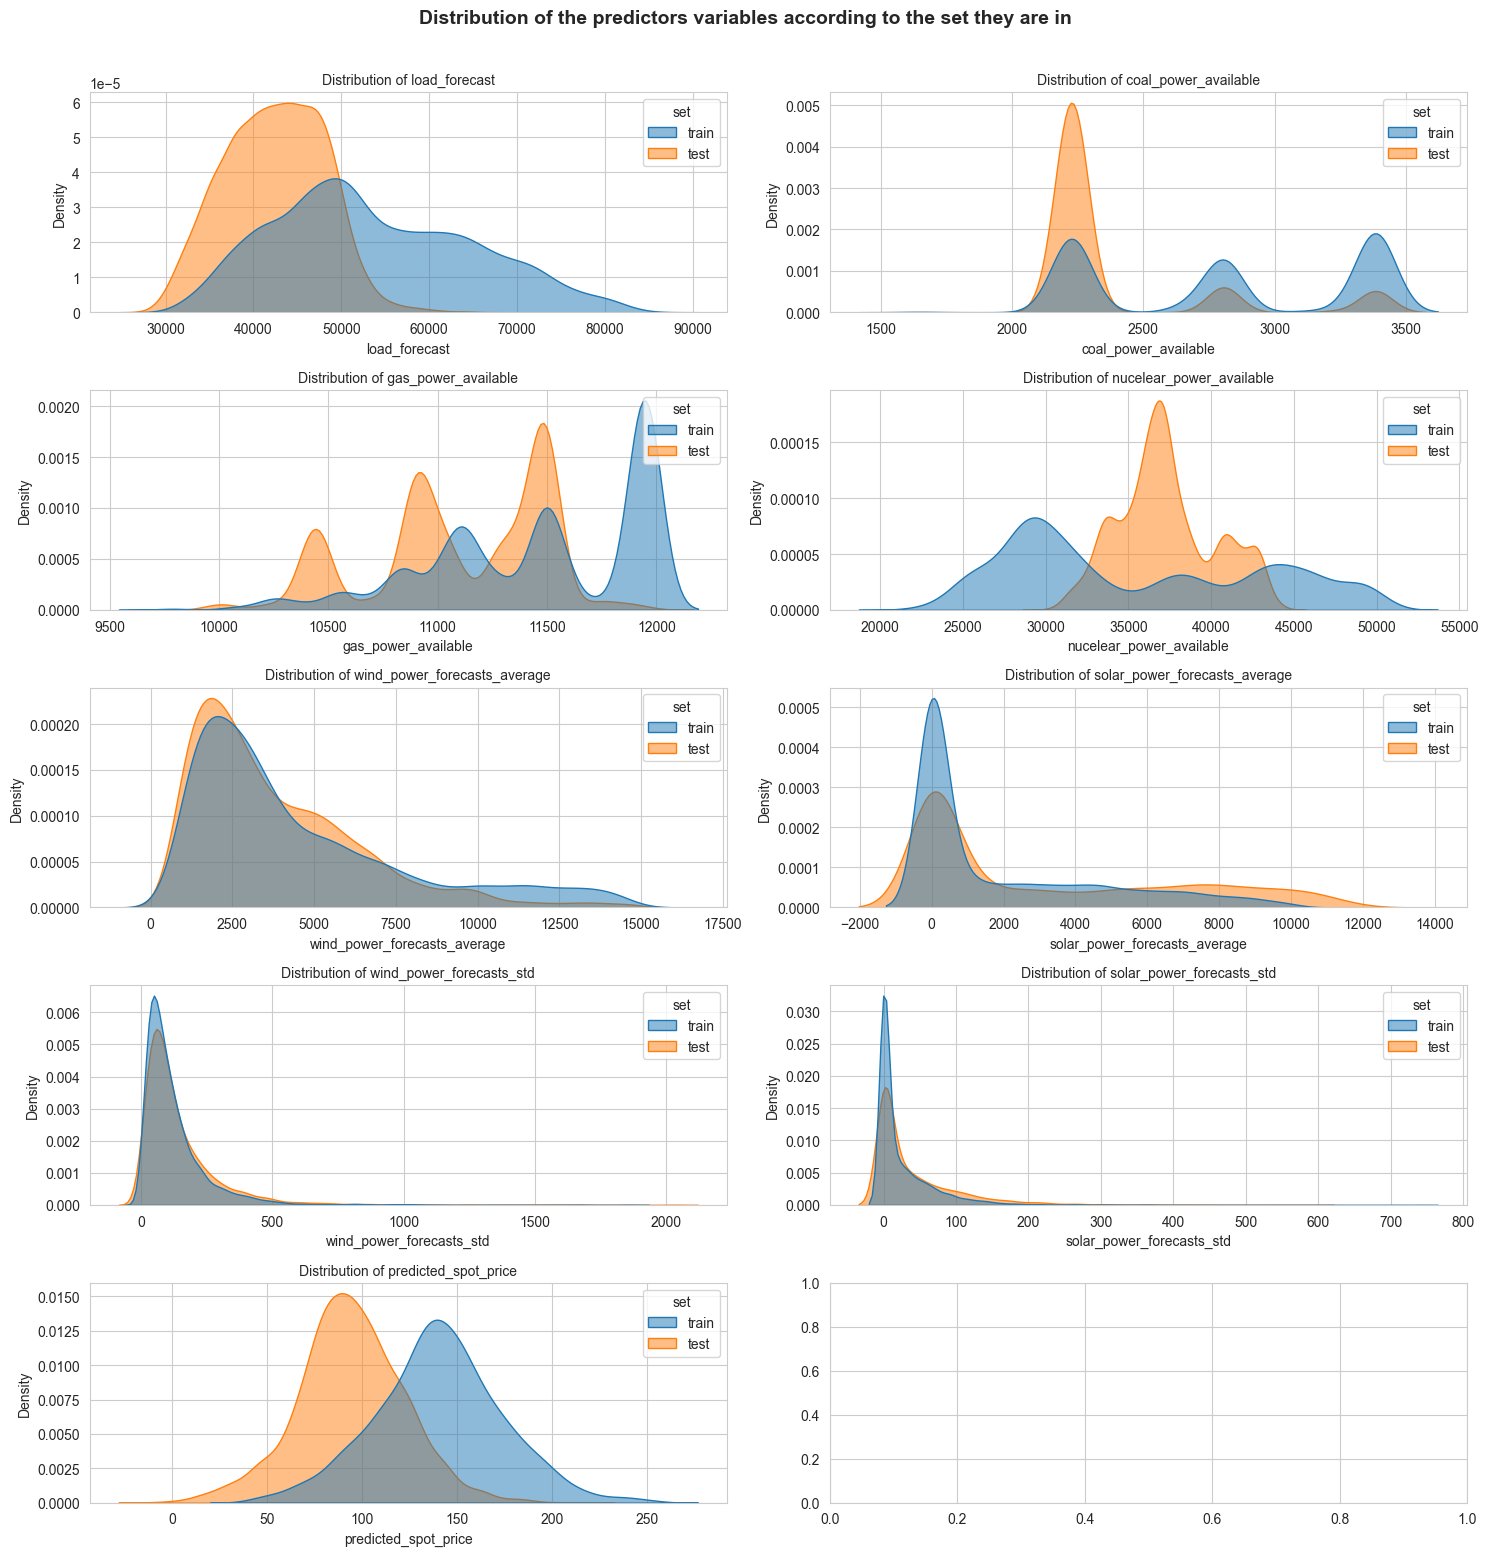

In [64]:
n_rows = 5 
n_cols = 2
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 16))

for k, col in enumerate(predictors_col):
    ax = axes[k // n_cols, k % n_cols]
    sns.kdeplot(
        data=df_temp,
        x=col,
        hue="set",
        fill=True, 
        common_norm=False,
        alpha=.5,
        linewidth=1,
        ax=ax
    )
    ax.set_title(f"Distribution of {col}", fontsize=10) 

fig.suptitle("Distribution of the predictors variables according to the set they are in", y=0.97, fontsize=14, fontweight='bold') 
fig.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

According to the distribution plot, seems to have the same distribution across train and test set except :       
- predicted_spot_price
- gas_power_available     
- nucelear_power_available     
- load_forecast    
- coal_power_available